In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("/content/cleaned_heart_disease_data.csv")

# Check if it loaded correctly
df.head()


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,90124,1,0.72,0.260000,0.280146,0.007273,1,1,0,0,1,0,43,0.263502
1,11256,1,0.71,0.340000,0.316687,0.007273,3,3,0,0,1,1,51,0.391038
2,48246,1,0.78,0.300000,0.292326,0.007273,1,1,0,1,1,1,51,0.273081
3,90865,2,0.78,0.360000,0.292326,0.007273,2,2,0,0,1,1,57,0.355703
4,29114,2,0.67,0.233333,0.292326,0.007273,1,1,0,0,1,0,57,0.263493


In [ ]:
# Check basic info
df.info()

# Get summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5000 non-null   int64  
 1   gender       5000 non-null   int64  
 2   height       5000 non-null   float64
 3   weight       5000 non-null   float64
 4   ap_hi        5000 non-null   float64
 5   ap_lo        5000 non-null   float64
 6   cholesterol  5000 non-null   int64  
 7   gluc         5000 non-null   int64  
 8   smoke        5000 non-null   int64  
 9   alco         5000 non-null   int64  
 10  active       5000 non-null   int64  
 11  cardio       5000 non-null   int64  
 12  age_years    5000 non-null   int64  
 13  bmi          5000 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 547.0 KB


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49868.528800,1.354000,0.665426,0.294128,0.300388,0.009026,1.38180,1.244600,0.084200,0.050200,0.814200,0.506800,52.941400,0.363774
std,28840.184524,0.478257,0.079160,0.092957,0.025382,0.021426,0.69291,0.593668,0.277715,0.218379,0.388984,0.500004,6.729653,0.142004
min,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,24681.500000,1.000000,0.610000,0.233333,0.292326,0.007273,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,0.263493
50%,49943.000000,1.000000,0.670000,0.280000,0.292326,0.007273,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,53.000000,0.336608
75%,75087.750000,2.000000,0.720000,0.346667,0.316687,0.008182,2.00000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,0.440969
max,99943.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.00000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000


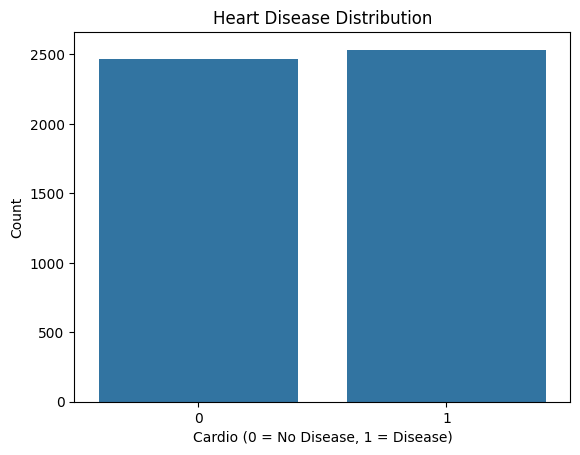

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of cardio cases
sns.countplot(x=df['cardio'])
plt.title("Heart Disease Distribution")
plt.xlabel("Cardio (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


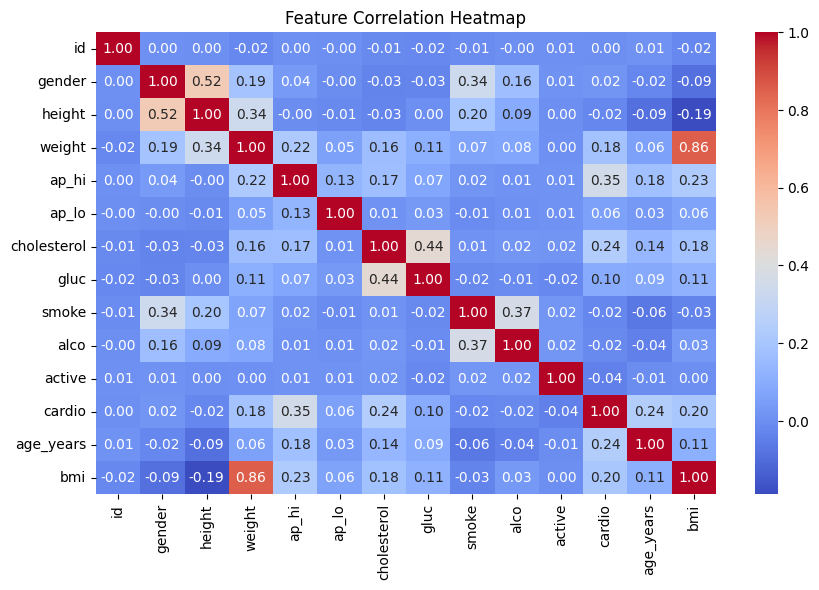

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'height'])

# Check the first few rows after dropping
df.head()


,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,1,0.260000,0.280146,0.007273,1,1,0,0,1,0,43,0.263502
1,1,0.340000,0.316687,0.007273,3,3,0,0,1,1,51,0.391038
2,1,0.300000,0.292326,0.007273,1,1,0,1,1,1,51,0.273081
3,2,0.360000,0.292326,0.007273,2,2,0,0,1,1,57,0.355703
4,2,0.233333,0.292326,0.007273,1,1,0,0,1,0,57,0.263493


In [ ]:
df.isnull().sum()


,0
gender,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0
active,0
cardio,0


In [ ]:
df.duplicated().sum()


np.int64(20)

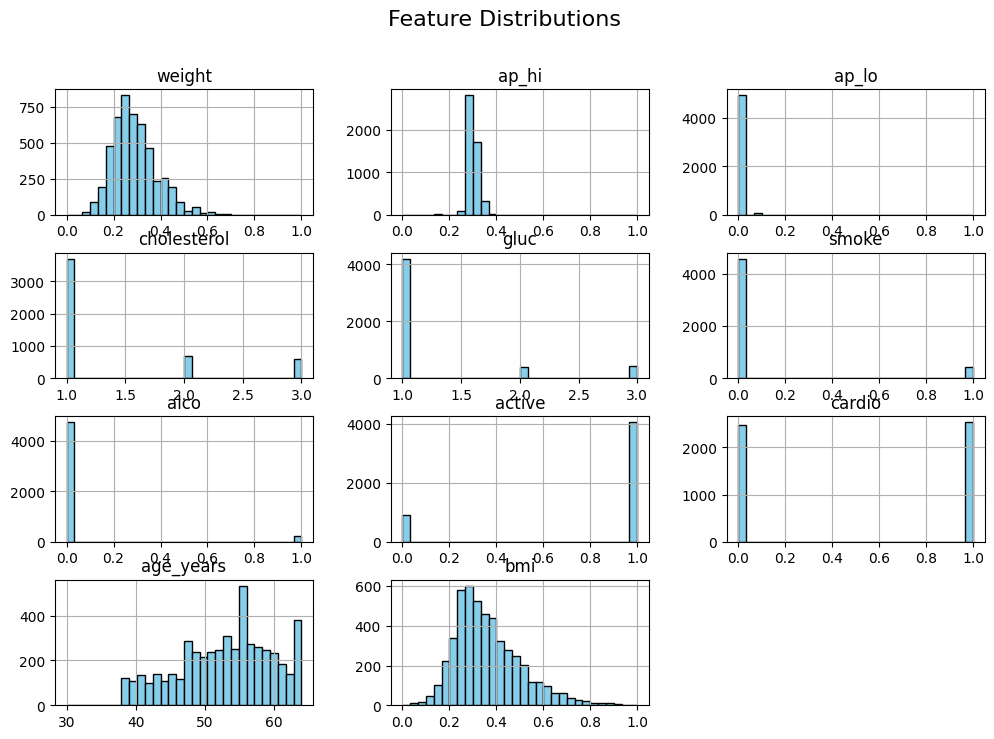

In [ ]:
import matplotlib.pyplot as plt

num_cols = ['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi']

# Plot histograms
df[num_cols].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()



<ipython-input-23-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
<ipython-input-23-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
<ipython-input-23-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
<ipython-input-23-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

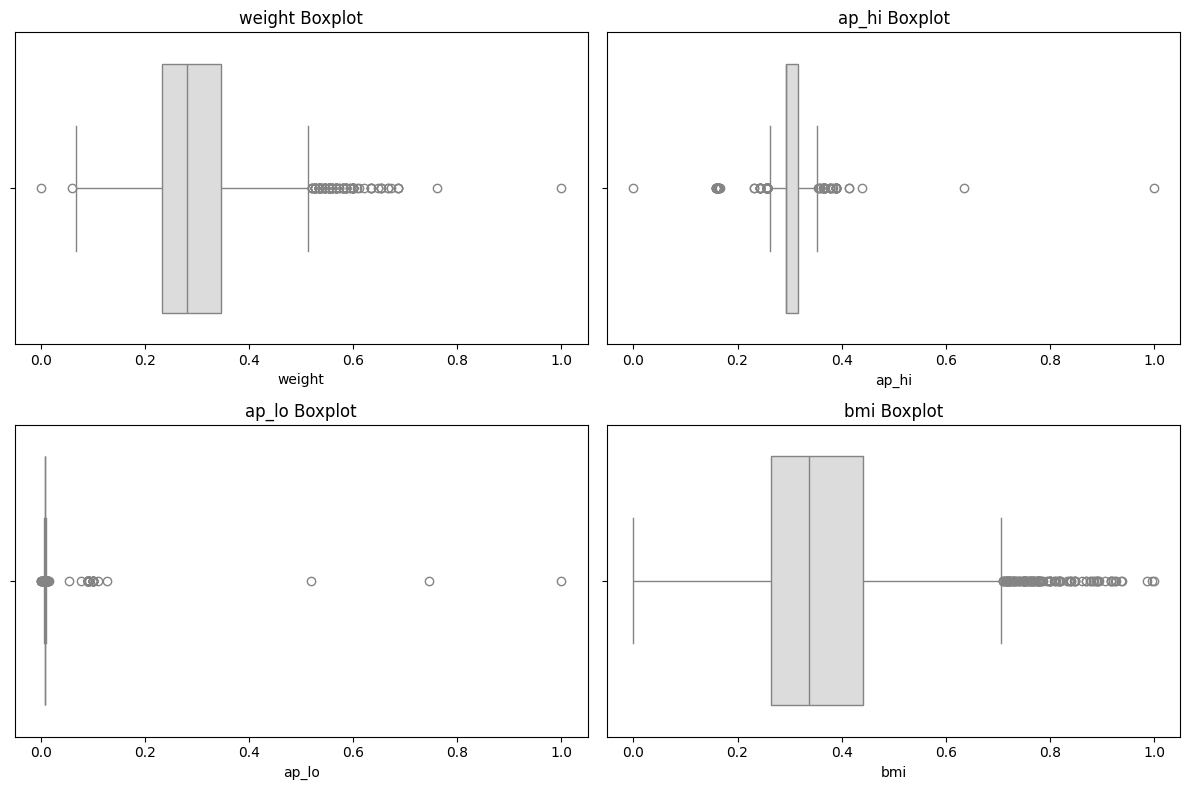

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['weight', 'ap_hi', 'ap_lo', 'bmi']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], palette="coolwarm")
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in ['weight', 'ap_hi', 'ap_lo', 'bmi']:
    df = remove_outliers(df, col)

print("Outliers removed!")


Outliers removed!


<ipython-input-25-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
<ipython-input-25-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
<ipython-input-25-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
<ipython-input-25-b7335bb71110>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

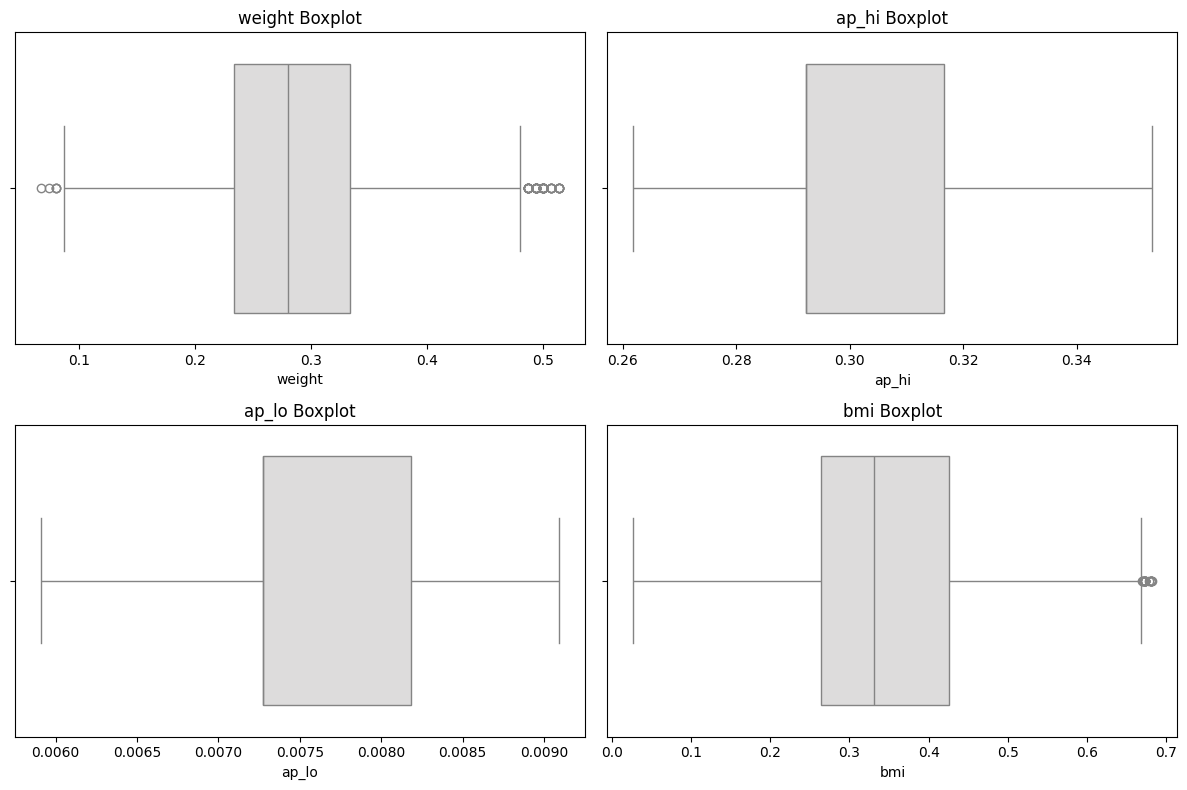

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['weight', 'ap_hi', 'ap_lo', 'bmi']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], palette="coolwarm")
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


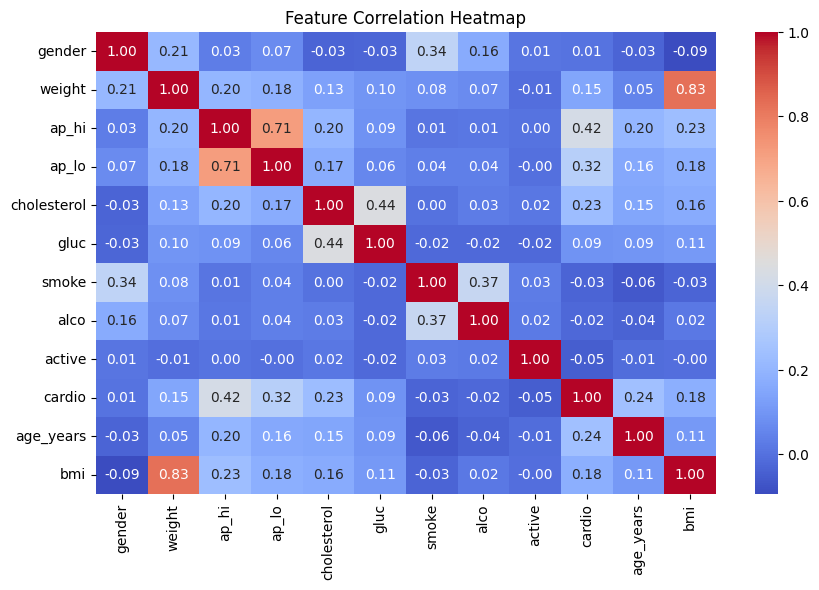

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Removed Features: {'weight'}
Remaining Features: Index(['gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio', 'age_years', 'bmi'],
      dtype='object')


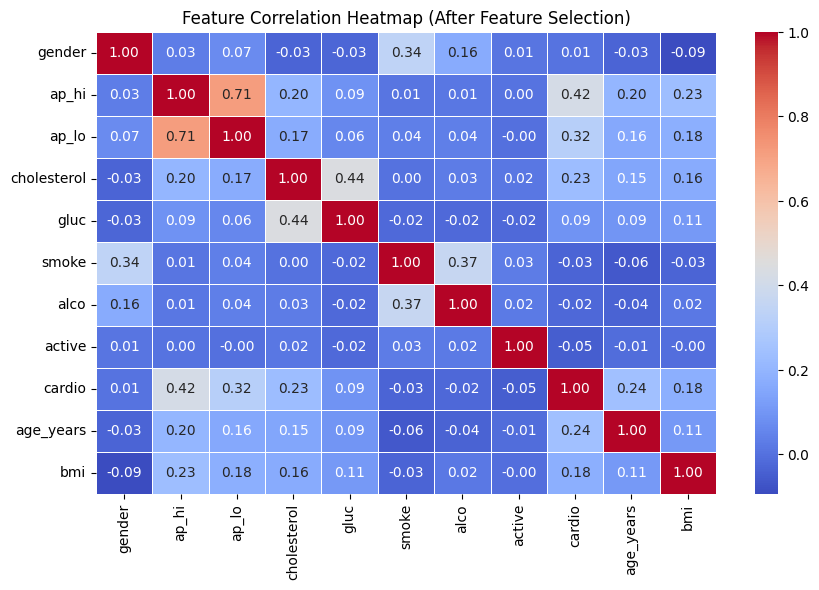

In [ ]:
# Feature Selection: Removing Highly Correlated Features (except BMI)
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Define correlation threshold (e.g., 0.75)
threshold = 0.75

# Identify highly correlated features
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            # Exclude 'bmi' from being dropped
            if colname != "bmi":
                to_drop.add(colname)

# Ensure 'weight' is removed if 'bmi' is present
if "bmi" in df.columns and "weight" in df.columns:
    to_drop.add("weight")

# Drop the selected features
df_selected = df.drop(columns=to_drop)

# Display removed and remaining features
print("Removed Features:", to_drop)
print("Remaining Features:", df_selected.columns)

# Verify by plotting the new correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (After Feature Selection)")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
num_cols = ["ap_hi", "ap_lo", "age_years", "bmi"]

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_selected[num_cols] = scaler.fit_transform(df_selected[num_cols])

# Display first few rows to verify
df_selected.head()


,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,1,-1.163229,-0.221253,1,1,0,0,1,0,-1.480006,-0.722581
1,1,0.966784,-0.221253,3,3,0,0,1,1,-0.293656,0.348502
2,1,-0.453225,-0.221253,1,1,0,1,1,1,-0.293656,-0.642132
3,2,-0.453225,-0.221253,2,2,0,0,1,1,0.596108,0.051750
4,2,-0.453225,-0.221253,1,1,0,0,1,0,0.596108,-0.722657


In [ ]:
df.to_csv("cleaned_data.csv", index=False)
